# Download GDP Data

Before getting started, be sure to reference [BEA API for Data Retrieval](https://apps.bea.gov/api/_pdf/bea_web_service_api_user_guide.pdf) open.

First we will want to [sign up](https://apps.bea.gov/api/signup/) to use the BEA API. After signing up, you will receive a key that you can use to download data.

In [1]:
!pip install datapungibea

import datapungibea as dpb
key = 'CB4F6ED0-78DB-4276-9AA5-3AAAAE92B764'
data = dpb.data(key) 
data

In [2]:
data._help

'\n         Userguides:\n          NOTE: Datasets RegionalIncome and RegionalProduct were deprecated, use Regional instead. \n          \n          https://apps.bea.gov/api/_pdf/bea_web_service_api_user_guide.pdf\n          https://www.bea.gov/tools/   or  https://apps.bea.gov/API/signup/index.cfm\n         \n          Basically, there are three types of meta (the first three tabs): \n            (1) GETDATASETLIST      top level, get the name of all tables.  \n            (2) GetParameterList    given a table, what parameters it needs to download (eg. NIPA)\n            (3) GetParameterValues  given a parameter of a table, which values you can choose. (eg. TableID)\n           \n            Use them to get: name of datasets, their paramaters, and the values of the parameters.  These \n            can be used in the searches of individual datasets (in the other tabs)  \n\n         Sample python code (getting the list of datasets):\n         \n            import requests \n            p

## Get comfortable donwloading data using national production measures.


### It will be useful to refences [BEA API for Data Retrieval description of the NIPA method](https://apps.bea.gov/api/_pdf/bea_web_service_api_user_guide.pdf#page=17). \_docDriver() also provides useful notes for the _datapungibea_ module.

In [3]:
data._docDriver("NIPA")

"\n        Get National Income and Product Account (NIPA) data. Most parameters are set to deafault values; passing \n        tableName will return a value of quarterly data in all available years.  Sample run -\n          NIPA('T10101')  \n          NIPA('T10101', frequency = 'A', year='X',verbose=True,includeIndentation=False)\n            \n        Args:\n            tableName (str): name of NIPA table, for example T10101\n            frequency (str): frequency of data - Annual (A), quarterly (Q) or monthly (M); default to Q\n            year (str): specific year or X for all years -  eg, '2019' or 'X'; default to X\n            payload (dict): this is the base request information of a BEA NIPA query; default - {'method': 'GETDATA', 'DATABASENAME': 'NIPA', 'datasetname': 'NIPA', 'ParameterName': 'TableID'}\n            outputFormat (str): tablePretty will clean up data and return pandas of variable by date; else returns table of (variable,date) by data; default to tablePretty\n     

In [4]:
data.NIPA('T10101', includeIndentations = True)


,,,1947Q2,1947Q3,1947Q4,1948Q1,1948Q2,1948Q3,1948Q4,1949Q1,1949Q2,1949Q3,...,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1
LineNumber,SeriesCode,LineDescription,,,,,,,,,,,,,,,,,,,,,
1,A191RL,Gross domestic product,-1.1,-0.8,6.4,6.2,6.8,2.3,0.5,-5.4,-1.4,4.2,...,1.9,-5.1,-31.2,33.8,4.5,6.3,6.7,2.3,6.9,-1.6
2,DPCERL,Personal consumption expenditures,6.8,1.3,0.1,2.0,4.7,0.6,3.2,0.7,6.3,0.9,...,1.7,-6.9,-33.4,41.4,3.4,11.4,12.0,2.0,2.5,1.8
3,DGDSRL,-Goods,7.4,2.7,1.5,0.6,3.7,-0.4,2.7,-0.6,9.1,2.1,...,1.8,0.3,-10.0,49.5,-0.3,27.4,13.0,-8.8,1.1,-0.3
4,DDURRL,--Durable goods,8.7,5.6,28.6,-2.0,2.7,7.0,-5.5,-7.1,39.4,20.5,...,5.0,-12.0,-1.5,89.0,1.1,50.0,11.6,-24.6,2.5,5.9
5,DNDGRL,--Nondurable goods,7.0,1.9,-5.1,1.3,4.0,-2.4,5.3,1.6,1.1,-3.5,...,0.3,7.1,-13.9,31.8,-1.1,15.9,13.9,2.0,0.4,-3.7
6,DSERRL,-Services,5.9,-0.8,-2.1,4.3,6.4,2.1,4.1,2.5,2.0,-0.8,...,1.7,-10.0,-42.4,37.5,5.3,3.9,11.5,8.2,3.3,3.0
7,A006RL,Gross private domestic investment,-27.3,-11.3,102.9,47.8,27.1,4.2,-17.8,-47.6,-43.5,37.5,...,-6.5,-5.3,-48.8,82.1,24.7,-2.3,-3.9,12.4,36.7,5.0
8,A007RL,-Fixed investment,-10.0,13.6,37.2,13.4,-0.6,-4.0,-4.5,-20.4,-11.6,-0.7,...,-1.1,-2.3,-30.4,27.5,17.7,13.0,3.3,-0.9,2.7,7.4
9,A008RL,--Nonresidential,-6.1,-7.2,11.6,25.3,-12.7,1.0,9.7,-17.1,-14.1,-17.1,...,-1.7,-8.1,-30.3,18.7,12.5,12.9,9.2,1.7,2.9,10.0


## We want to download county level data using the .Regional() method.
It will be useful to refences [BEA API for Data Retrieval description of the Regional method](https://apps.bea.gov/api/_pdf/bea_web_service_api_user_guide.pdf#page=57). As with NIPA, we can use _.docDriver()_ to access information about the Regional method.

In [5]:
print(data._docDriver('Regional'))


        Query the IntlServTrade database (API query)  
        Sample run -
         
        
        Args:
            GeoFips (str): eg
            LineCode (str): eg
            TableName (str): eg 
            Year (str): eg 'X' for all or '2019'
            payload (dict): request default {'method': 'GETDATA',  'datasetname': 'Regional'},
            verbose (bool): if returns that data in a pandas dataframe format or all available information; default to False
        Returns:
            output: either a pandas dataframe or a dictionary (verbose=True) with dataFrame, request, and code              
        


## Since we want to download county level GDP data, we will use values from CAGDP9. To automate data collection, we will need to collect the county FIPS values and the full set of variables contained in CAGDP9. First we will create a list of  county fips.

In [6]:
# Collect county level variables
for_county_index = data.Regional(GeoFips = "COUNTY",
              LineCode = "1",
              TableName = "CAGDP9", 
              Year = "2010")
for_county_index

,Code,GeoFips,GeoName,TimePeriod,CL_UNIT,UNIT_MULT,DataValue,NoteRef
0,CAGDP9-1,01001,"Autauga, AL",2010,Thousands of chained 2012 dollars,3,"1,286,603",NaN
1,CAGDP9-1,01003,"Baldwin, AL",2010,Thousands of chained 2012 dollars,3,"5,381,575",NaN
2,CAGDP9-1,01005,"Barbour, AL",2010,Thousands of chained 2012 dollars,3,"784,043",NaN
3,CAGDP9-1,01007,"Bibb, AL",2010,Thousands of chained 2012 dollars,3,"364,023",NaN
4,CAGDP9-1,01009,"Blount, AL",2010,Thousands of chained 2012 dollars,3,"839,899",NaN
...,...,...,...,...,...,...,...,...
3113,CAGDP9-1,56037,"Sweetwater, WY",2010,Thousands of chained 2012 dollars,3,"4,423,250",NaN
3114,CAGDP9-1,56039,"Teton, WY",2010,Thousands of chained 2012 dollars,3,"1,811,469",NaN
3115,CAGDP9-1,56041,"Uinta, WY",2010,Thousands of chained 2012 dollars,3,"1,215,130",NaN
3116,CAGDP9-1,56043,"Washakie, WY",2010,Thousands of chained 2012 dollars,3,"388,974",NaN


## Next we make a list of GDP components

In [7]:
counties = for_county_index["GeoFips"]
counties

0       01001
1       01003
2       01005
3       01007
4       01009
        ...  
3113    56037
3114    56039
3115    56041
3116    56043
3117    56045
Name: GeoFips, Length: 3118, dtype: object

In [8]:
for_GDP_components = data.Regional(GeoFips = "01001",
              LineCode = "ALL",
              TableName = "CAGDP9", 
              Year = "2010")
for_GDP_components

,Code,GeoFips,GeoName,TimePeriod,Description,CL_UNIT,UNIT_MULT,DataValue,NoteRef
0,CAGDP9-50,01001,"Autauga, AL",2010,"Finance, insurance, real estate, rental, and l...",Thousands of chained 2012 dollars,3,"247,695",NaN
1,CAGDP9-45,01001,"Autauga, AL",2010,Information,Thousands of chained 2012 dollars,3,"5,536",NaN
2,CAGDP9-36,01001,"Autauga, AL",2010,Transportation and warehousing,Thousands of chained 2012 dollars,3,"12,922",NaN
3,CAGDP9-35,01001,"Autauga, AL",2010,Retail trade,Thousands of chained 2012 dollars,3,"94,387",NaN
4,CAGDP9-34,01001,"Autauga, AL",2010,Wholesale trade,Thousands of chained 2012 dollars,3,"45,831",NaN
5,CAGDP9-25,01001,"Autauga, AL",2010,Nondurable goods manufacturing,Thousands of chained 2012 dollars,3,(D),(D)
6,CAGDP9-13,01001,"Autauga, AL",2010,Durable goods manufacturing,Thousands of chained 2012 dollars,3,(D),(D)
7,CAGDP9-12,01001,"Autauga, AL",2010,Manufacturing,Thousands of chained 2012 dollars,3,"212,608",NaN
8,CAGDP9-11,01001,"Autauga, AL",2010,Construction,Thousands of chained 2012 dollars,3,"39,798",NaN
9,CAGDP9-10,01001,"Autauga, AL",2010,Utilities,Thousands of chained 2012 dollars,3,"204,705",NaN


In [9]:
GDP_components = for_GDP_components[["Code", "Description"]]
GDP_components

,Code,Description
0,CAGDP9-50,"Finance, insurance, real estate, rental, and l..."
1,CAGDP9-45,Information
2,CAGDP9-36,Transportation and warehousing
3,CAGDP9-35,Retail trade
4,CAGDP9-34,Wholesale trade
5,CAGDP9-25,Nondurable goods manufacturing
6,CAGDP9-13,Durable goods manufacturing
7,CAGDP9-12,Manufacturing
8,CAGDP9-11,Construction
9,CAGDP9-10,Utilities


In [10]:
import time
import random

GDP_data_dct = {}

# Download data here. Uncomment to download. Then comment out so that in the future you just import the data.

In [11]:
for row in GDP_components.iterrows():
    full_code, description = row[1]
    table_name, code = full_code.split("-")
    
    try:
        GDP_data_dct[description] = data.Regional(GeoFips = "COUNTY",
               LineCode = code,
               TableName = table_name, 
              Year = "ALL")
        print(full_code +": " + description + " downloaded")
    except:
        print(full_code +": Error downloading " + description)
    time.sleep(10)

CAGDP9-50: Finance, insurance, real estate, rental, and leasing downloaded
CAGDP9-45: Information downloaded
CAGDP9-36: Error downloading Transportation and warehousing
CAGDP9-35: Error downloading Retail trade
CAGDP9-34: Error downloading Wholesale trade
CAGDP9-25: Nondurable goods manufacturing downloaded
CAGDP9-13: Durable goods manufacturing downloaded
CAGDP9-12: Manufacturing downloaded
CAGDP9-11: Construction downloaded
CAGDP9-10: Utilities downloaded
CAGDP9-6: Mining, quarrying, and oil and gas extraction downloaded
CAGDP9-3: Agriculture, forestry, fishing and hunting downloaded
CAGDP9-2: Private industries downloaded
CAGDP9-1: All industry total downloaded
CAGDP9-92: Private services-providing industries 3/ downloaded
CAGDP9-91: Private goods-producing industries 2/ downloaded
CAGDP9-90: Manufacturing and information downloaded
CAGDP9-89: Transportation and utilities downloaded
CAGDP9-88: Error downloading Trade
CAGDP9-87: Natural resources and mining downloaded
CAGDP9-83: Erro

## Next let's save the data. We do because it is good practice to only redownload a dataset if it has recently been updated. It is particularly important in this case since the  datasets are greater than 5 MB each.

In [12]:
# !pip install descartes
import geopandas
import numpy as np
import pandas as pd
# We won't actually use datetime directly. Since the dataframe index will use 
# data formatted as datetime64, I import it in case I need to use the datetime
# module to troubleshoot later 
import datetime
# you could technically call many of the submodules from matplotlib using mpl., 
#but for convenience we explicitly import submodules. These will be used for 
# constructing visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
# If you choose to make a dynamic visualization for the homework
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick


In [13]:
import os
folder1 = "Data"
folder2 = "CountyGDP"
try:
    os.mkdir(folder1)
    os.mkdir(folder1 + "/" + folder2)
except:
    try: 
        os.mkdir(folder1 + "/" + folder2)
    except:
        pass
for key, val in GDP_data_dct.items():
    val.to_csv(folder1 + "/" + folder2 + "/" + key.replace("/","") + ".csv")

for row in GDP_components.iterrows():
    full_code, description = row[1]
    GDP_data_dct[description] = pd.read_csv("Data/CountyGDP/" + description.replace("/","") + ".csv")
GDP_data_dct
    

{'Finance, insurance, real estate, rental, and leasing':        Unnamed: 0       Code  GeoFips      GeoName  TimePeriod  \
 0               0  CAGDP9-50     1001  Autauga, AL        2013   
 1               1  CAGDP9-50     1001  Autauga, AL        2008   
 2               2  CAGDP9-50     1001  Autauga, AL        2015   
 3               3  CAGDP9-50     1001  Autauga, AL        2009   
 4               4  CAGDP9-50     1001  Autauga, AL        2004   
 ...           ...        ...      ...          ...         ...   
 62355       62355  CAGDP9-50    56045   Weston, WY        2003   
 62356       62356  CAGDP9-50    56045   Weston, WY        2014   
 62357       62357  CAGDP9-50    56045   Weston, WY        2010   
 62358       62358  CAGDP9-50    56045   Weston, WY        2008   
 62359       62359  CAGDP9-50    56045   Weston, WY        2019   
 
                                  CL_UNIT  UNIT_MULT DataValue NoteRef  
 0      Thousands of chained 2012 dollars          3   262,810   

In [14]:
full_df = pd.DataFrame({key: val.set_index(["GeoFips", "TimePeriod"])["DataValue"] for key, val in GDP_data_dct.items()})
full_df

Finance, insurance, real estate, rental, and leasing  \
GeoFips TimePeriod                                                        
1001    2001                                                  168,804     
        2002                                                  176,965     
        2003                                                  184,378     
        2004                                                  214,261     
        2005                                                  230,729     
...                                                               ...     
56045   2016                                                   45,691     
        2017                                                   41,180     
        2018                                                   39,779     
        2019                                                   39,167     
        2020                                                   36,963     

                   Information Nondurable goods manufacturing  \
GeoFips TimePeriod                                              
1001    2001             5,281                            (D)   
        2002             8,365                            (D)   
        2003             9,697                        143,362   
        2004            10,385                            (D)   
        2005            10,900                            (D)   
...                        ...                            ...   
56045   2016             2,735                            (D)   
        2017             3,389                            (D)   
        2018             2,932                        107,403   
        2019             2,629                        122,440   
        2020             2,520                        134,673   

                   Durable goods manufacturing Manufacturing Construction  \
GeoFips TimePeriod                                                          
1001    2001                               (D)       211,416      111,710   
        2002                               (D)       212,494       69,905   
        2003                            37,954       182,349       64,250   
        2004                               (D)       236,107       65,860   
        2005                               (D)       253,936       55,006   
...                                        ...           ...          ...   
56045   2016                               (D)        77,947       11,967   
        2017                               (D)       101,963        8,527   
        2018                               (D)           (D)          (D)   
        2019                               (D)           (D)          (D)   
        2020                               (D)           (D)          (D)   

                   Utilities Mining, quarrying, and oil and gas extraction  \
GeoFips TimePeriod                                                           
1001    2001          23,121                                         4,644   
        2002          53,320                                         3,053   
        2003          57,076                                         3,696   
        2004          94,578                                         5,917   
        2005          74,428                                         7,513   
...                      ...                                           ...   
56045   2016             762                                        35,145   
        2017             742                                        34,812   
        2018             792                                        42,804   
        2019             963                                        52,783   
        2020             875                                        37,766   

                   Agriculture, forestry, fishing and hunting  \
GeoFips TimePeriod                                              
1001    2001                                      

In [140]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import geopandas
import datetime


In [103]:
def OLS_summary(results):
    summary = {"$\\beta $":results.params, 
               "$t$": results.tvalues,
               "$$P>|t|$$":results.pvalues,
               # calculate standard errors by taking the square root of the variance values 
               # along the diagonal of the covariance matrix 
              "$SE$":[results.cov_params()[var][var] ** (.5) for var in results.cov_params()]}
    summary = pd.DataFrame(summary)
    # add r^2 using index name
    summary.index.name = "$$r^2: "+str(round(results.rsquared,3)) + "$$"
    return summary.round(3)




In [191]:
def import_geo_data(filename, index_col = "TimePeriod", FIPS_name = "GeoFips"):
    map_data = geopandas.read_file(filename = filename,                                   
                                   index_col = index_col)
    map_data.rename(columns={"State":"state"},
                    inplace = True)
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) + \
        map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    # set FIPS as index
    map_data.set_index(FIPS_name, inplace=True)
    
    return map_data

In [190]:
map_data = import_geo_data(
    filename = "Data/CountyGDP/" + description.replace("/","") + ".csv",
    index_col = "Date", FIPS_name= "GeoFips")

KeyError: 'STATEFP'

In [44]:
for key, val in full_df.items():
    full_df[key] = val.str.replace(",","").replace("(NA)", np.NaN).replace('(D)', np.NaN).astype(np.float64)


In [48]:
full_df

Finance, insurance, real estate, rental, and leasing  \
GeoFips TimePeriod                                                         
1001    2001                                                 168804.0      
        2002                                                 176965.0      
        2003                                                 184378.0      
        2004                                                 214261.0      
        2005                                                 230729.0      
...                                                               ...      
56045   2016                                                  45691.0      
        2017                                                  41180.0      
        2018                                                  39779.0      
        2019                                                  39167.0      
        2020                                                  36963.0      

                    Information  Nondurable goods manufacturing  \
GeoFips TimePeriod                                                
1001    2001             5281.0                             NaN   
        2002             8365.0                             NaN   
        2003             9697.0                        143362.0   
        2004            10385.0                             NaN   
        2005            10900.0                             NaN   
...                         ...                             ...   
56045   2016             2735.0                             NaN   
        2017             3389.0                             NaN   
        2018             2932.0                        107403.0   
        2019             2629.0                        122440.0   
        2020             2520.0                        134673.0   

                    Durable goods manufacturing  Manufacturing  Construction  \
GeoFips TimePeriod                                                             
1001    2001                                NaN       211416.0      111710.0   
        2002                                NaN       212494.0       69905.0   
        2003                            37954.0       182349.0       64250.0   
        2004                                NaN       236107.0       65860.0   
        2005                                NaN       253936.0       55006.0   
...                                         ...            ...           ...   
56045   2016                                NaN        77947.0       11967.0   
        2017                                NaN       101963.0        8527.0   
        2018                                NaN            NaN           NaN   
        2019                                NaN            NaN           NaN   
        2020                                NaN            NaN           NaN   

                    Utilities  Mining, quarrying, and oil and gas extraction  \
GeoFips TimePeriod                                                             
1001    2001          23121.0                                         4644.0   
        2002          53320.0                                         3053.0   
        2003          57076.0                                         3696.0   
        2004          94578.0                                         5917.0   
        2005          74428.0                                         7513.0   
...                       ...                                            ...   
56045   2016            762.0                                        35145.0   
        2017            742.0                                        34812.0   
        2018            792.0                                        42804.0   
        2019            963.0                                        52783.0   
        2020            875.0                                        37766.0   

                    Agriculture, forestry, fishing and hunting  \
GeoFips Tim

In [47]:
full_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
"Finance, insurance, real estate, rental, and leasing",61700.0,1006469.77,5343058.04,264.0,49997.75,125389.5,386308.00,230342264.0
Information,50671.0,315035.88,2856796.83,0.0,4620.50,14133.0,57725.50,142393895.0
Nondurable goods manufacturing,45752.0,388789.32,1661123.95,0.0,11002.00,63039.5,240571.50,68306606.0
Durable goods manufacturing,45180.0,414086.08,1691283.50,0.0,17331.75,79759.0,269336.50,80262511.0
Manufacturing,56079.0,696845.94,2658354.13,0.0,30315.00,132482.0,451551.00,85087035.0
Construction,55778.0,233245.69,820089.11,0.0,14584.25,40545.0,128702.00,19133223.0
Utilities,55216.0,85062.15,264796.70,0.0,1330.75,6040.5,35760.50,5649344.0
"Mining, quarrying, and oil and gas extraction",62039.0,115413.81,730048.54,0.0,409.00,5204.0,29476.00,37422590.0
"Agriculture, forestry, fishing and hunting",48942.0,68323.85,219868.82,0.0,8766.25,27091.5,68905.75,7187784.0
Private industries,62243.0,4510049.13,19748542.88,4040.0,281670.00,746617.0,2180707.50,638121694.0


In [60]:
full_df["Information"]

GeoFips  TimePeriod
1001     2001           5281.0
         2002           8365.0
         2003           9697.0
         2004          10385.0
         2005          10900.0
                        ...   
56045    2016           2735.0
         2017           3389.0
         2018           2932.0
         2019           2629.0
         2020           2520.0
Name: Information, Length: 62360, dtype: float64

In [148]:
full_df["Utilities"]

GeoFips  TimePeriod
1001     2001          23121.0
         2002          53320.0
         2003          57076.0
         2004          94578.0
         2005          74428.0
                        ...   
56045    2016            762.0
         2017            742.0
         2018            792.0
         2019            963.0
         2020            875.0
Name: Utilities, Length: 62360, dtype: float64

In [55]:
full_df.corr()

,"Finance, insurance, real estate, rental, and leasing",Information,Nondurable goods manufacturing,Durable goods manufacturing,Manufacturing,Construction,Utilities,"Mining, quarrying, and oil and gas extraction","Agriculture, forestry, fishing and hunting",Private industries,...,Management of companies and enterprises,"Professional, scientific, and technical services",Professional and business services,Real estate and rental and leasing,Finance and insurance,Transportation and warehousing,Retail trade,Wholesale trade,Trade,Government and government enterprises
"Finance, insurance, real estate, rental, and leasing",1.000000,0.812963,0.509380,0.580987,0.594453,0.742756,0.506245,0.132685,0.103295,0.940276,...,0.880116,0.920580,0.937223,0.898874,0.924849,0.843368,0.819074,0.822296,0.837607,0.779240
Information,0.812963,1.000000,0.388574,0.641172,0.585957,0.564536,0.398321,0.075258,0.057360,0.842529,...,0.730482,0.846539,0.836761,0.766184,0.721506,0.625982,0.739539,0.686381,0.724118,0.648907
Nondurable goods manufacturing,0.509380,0.388574,1.000000,0.506356,0.864173,0.668960,0.526579,0.394300,0.067584,0.659704,...,0.509090,0.534481,0.569250,0.609339,0.322247,0.697599,0.616887,0.700169,0.679770,0.554394
Durable goods manufacturing,0.580987,0.641172,0.506356,1.000000,0.871293,0.701591,0.469569,0.190954,0.077349,0.752986,...,0.619390,0.669526,0.697341,0.723350,0.341587,0.633777,0.758630,0.733695,0.760072,0.636897
Manufacturing,0.594453,0.585957,0.864173,0.871293,1.000000,0.786097,0.555686,0.331137,0.086856,0.796524,...,0.625633,0.668698,0.704637,0.759573,0.351026,0.755802,0.790219,0.818536,0.824027,0.682870
Construction,0.742756,0.564536,0.668960,0.701591,0.786097,1.000000,0.632486,0.304384,0.133205,0.865682,...,0.719935,0.740640,0.790600,0.884787,0.495661,0.820420,0.913500,0.892330,0.920471,0.833221
Utilities,0.506245,0.398321,0.526579,0.469569,0.555686,0.632486,1.000000,0.287166,0.218006,0.600378,...,0.509634,0.520637,0.545176,0.610207,0.332980,0.582797,0.606720,0.599035,0.621362,0.600983
"Mining, quarrying, and oil and gas extraction",0.132685,0.075258,0.394300,0.190954,0.331137,0.304384,0.287166,1.000000,0.094215,0.249041,...,0.151789,0.189131,0.190403,0.185147,0.074610,0.342236,0.204843,0.332832,0.289434,0.177798
"Agriculture, forestry, fishing and hunting",0.103295,0.057360,0.067584,0.077349,0.086856,0.133205,0.218006,0.094215,1.000000,0.118589,...,0.064882,0.065850,0.078608,0.120384,0.056679,0.083407,0.143065,0.087087,0.110928,0.156241
Private industries,0.940276,0.842529,0.659704,0.752986,0.796524,0.865682,0.600378,0.249041,0.118589,1.000000,...,0.884539,0.941191,0.966520,0.964098,0.766125,0.873121,0.931472,0.933832,0.952348,0.864150


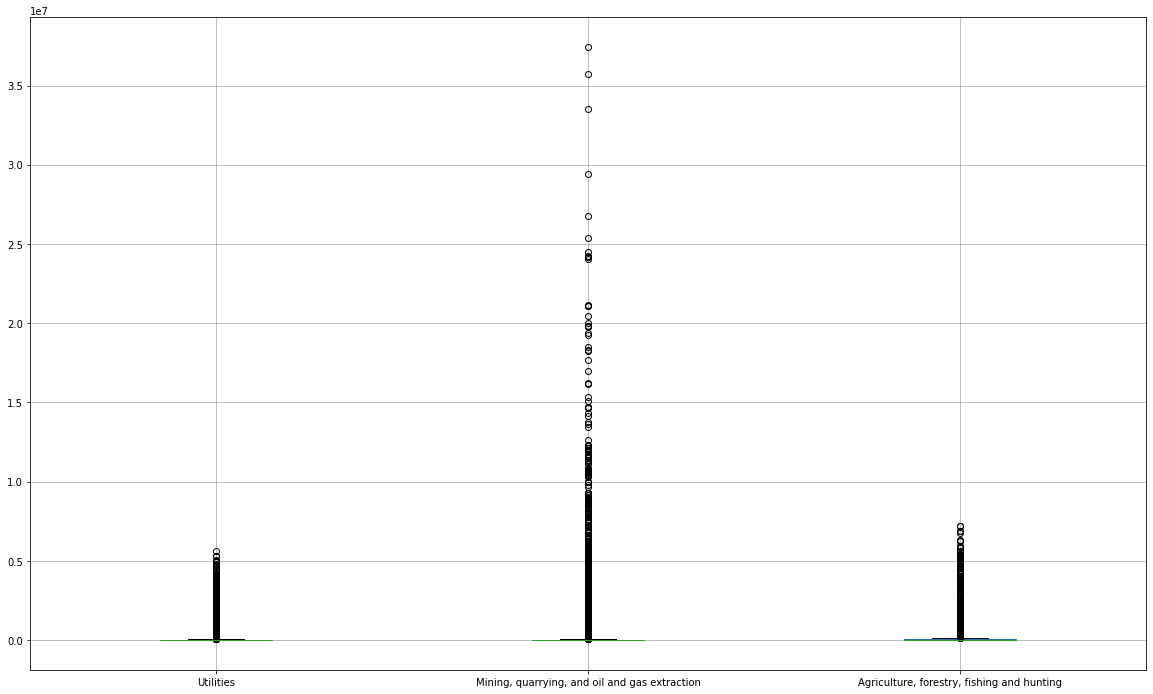

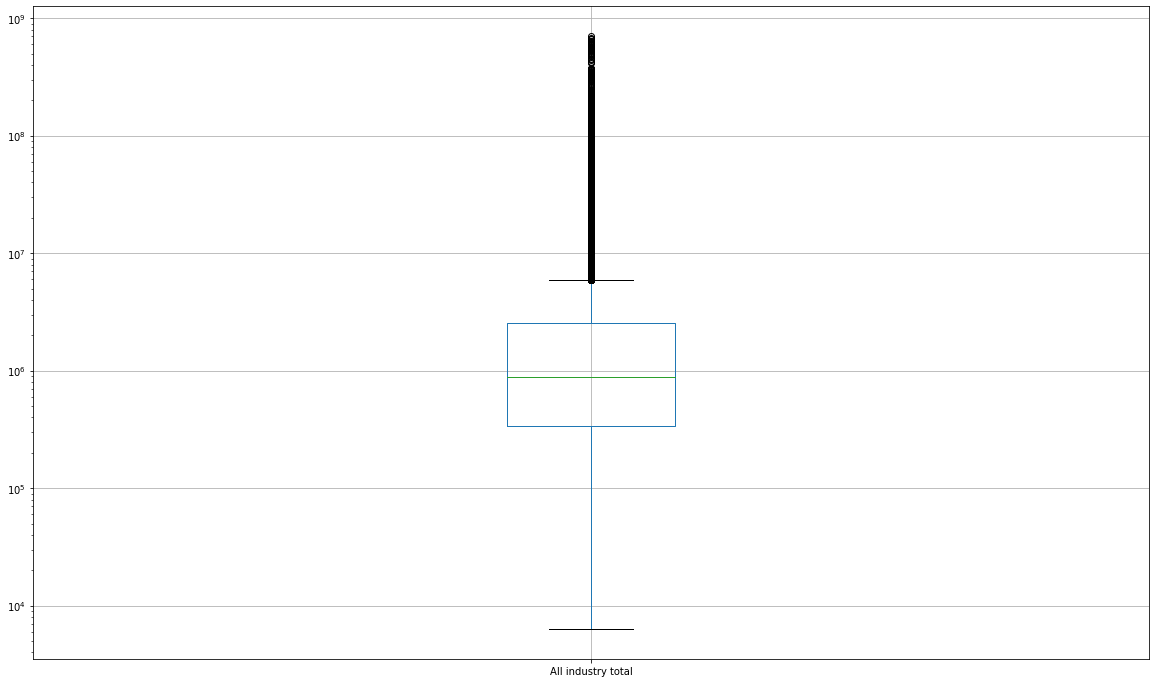

In [57]:
keys = ["Utilities", "Mining, quarrying, and oil and gas extraction", "Agriculture, forestry, fishing and hunting"]
keys2 = ["All industry total"]

fig,ax = plt.subplots(figsize = (20,12))
full_df[keys].boxplot(ax = ax)
fig,ax = plt.subplots(figsize = (20,12))
full_df[keys2].boxplot(ax = ax)
ax.set_yscale("log")

<AxesSubplot:ylabel='Frequency'>

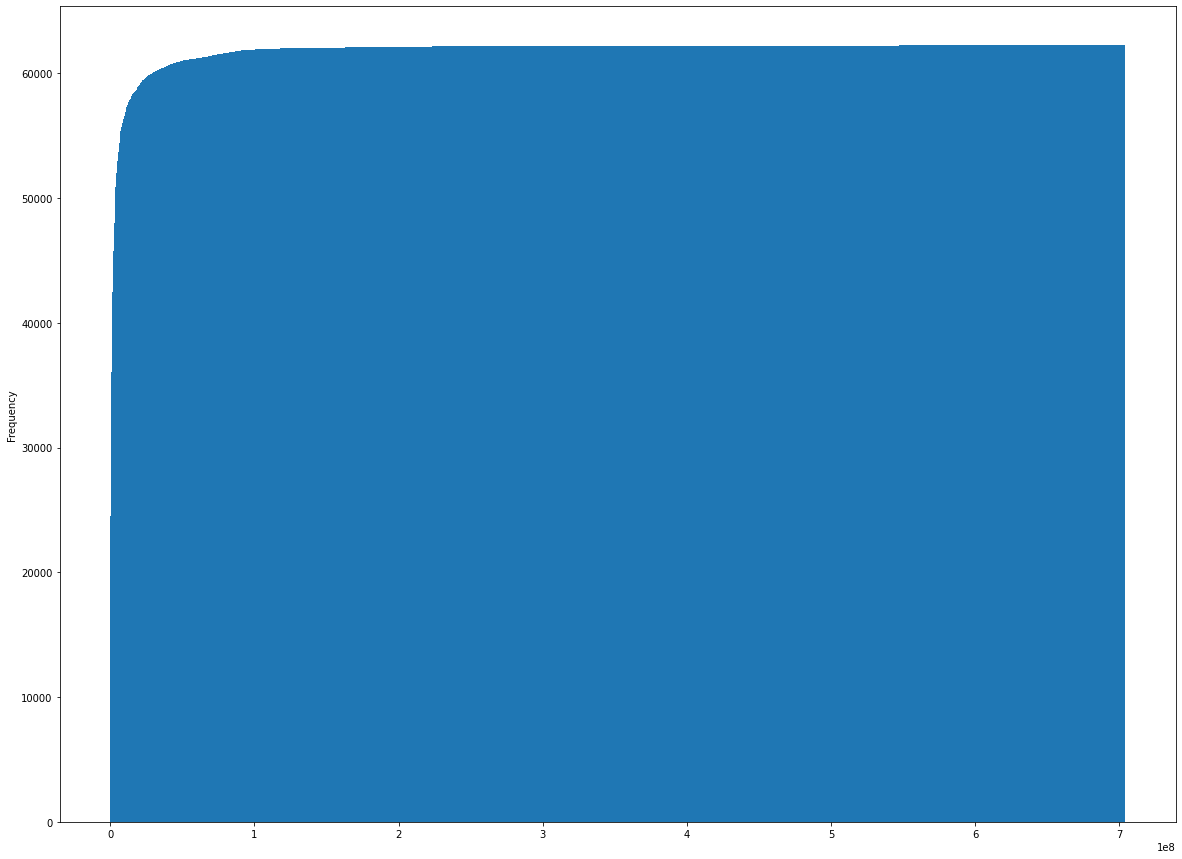

In [61]:
fig,ax = plt.subplots(figsize = (20,15))
full_df["All industry total"].plot.hist(cumulative=True, bins = 1200, ax = ax, linewidth = 5) 

In [96]:
# to use .rolling() for a multiindex to create a new variable, reset index, than choose column to groupby
# full_df["Rolling Avg . . . "] = full_df.reset_index().groupby(["GeoFips"]).rolling(4).mean()[col_name]
full_df.reset_index().groupby(["GeoFips"]).rolling(4).mean()


TimePeriod  \
GeoFips                     
1001    0             NaN   
        1             NaN   
        2             NaN   
        3          2002.5   
        4          2003.5   
...                   ...   
56045   62355      2014.5   
        62356      2015.5   
        62357      2016.5   
        62358      2017.5   
        62359      2018.5   

               Finance, insurance, real estate, rental, and leasing  \
GeoFips                                                               
1001    0                                                    NaN      
        1                                                    NaN      
        2                                                    NaN      
        3                                              186102.00      
        4                                              201583.25      
...                                                          ...      
56045   62355                                           47316.50      
        62356                                           45972.25      
        62357                                           43758.75      
        62358                                           41454.25      
        62359                                           39272.25      

               Information  Nondurable goods manufacturing  \
GeoFips                                                      
1001    0              NaN                             NaN   
        1              NaN                             NaN   
        2              NaN                             NaN   
        3          8432.00                             NaN   
        4          9836.75                             NaN   
...                    ...                             ...   
56045   62355      2560.25                             NaN   
        62356      2696.00                             NaN   
        62357      2886.00                             NaN   
        62358      2921.25                             NaN   
        62359      2867.50                             NaN   

               Durable goods manufacturing  Manufacturing  Construction  \
GeoFips                                                                   
1001    0                              NaN            NaN           NaN   
        1                              NaN            NaN           NaN   
        2                              NaN            NaN           NaN   
        3                              NaN      210591.50      77931.25   
        4                              NaN      221221.50      63755.25   
...                                    ...            ...           ...   
56045   62355                          NaN            NaN      14482.50   
        62356                          NaN       83576.25      13354.50   
        62357                          NaN            NaN           NaN   
        62358                          NaN            NaN           NaN   
        62359                          NaN            NaN           NaN   

               Utilities  Mining, quarrying, and oil and gas extraction  \
GeoFips                                                                   
1001    0            NaN                                            NaN   
        1            NaN                                            NaN   
        2            NaN                                            NaN   
        3       57023.75                                        4327.50   
        4       69850.50                                        5044.75   
...                  ...                                            ...   
56045   62355     827.00                                       32302.00   
        62356     812.00                                       33509.00   
        62357     805.25                                       37144.25   
        62358     814.75                                       41386.00   
        62359     843.00      

In [98]:
full_df.reset_index().groupby(["GeoFips"]).diff()

,TimePeriod,"Finance, insurance, real estate, rental, and leasing",Information,Nondurable goods manufacturing,Durable goods manufacturing,Manufacturing,Construction,Utilities,"Mining, quarrying, and oil and gas extraction","Agriculture, forestry, fishing and hunting",...,Management of companies and enterprises,"Professional, scientific, and technical services",Professional and business services,Real estate and rental and leasing,Finance and insurance,Transportation and warehousing,Retail trade,Wholesale trade,Trade,Government and government enterprises
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,8161.0,3084.0,NaN,NaN,1078.0,-41805.0,30199.0,-1591.0,-4392.0,...,NaN,643.0,1465.0,4328.0,3591.0,-529.0,8338.0,2523.0,10919.0,14518.0
2,1.0,7413.0,1332.0,NaN,NaN,-30145.0,-5655.0,3756.0,643.0,21878.0,...,NaN,-1661.0,1371.0,7096.0,309.0,-55.0,8968.0,4404.0,13305.0,8521.0
3,1.0,29883.0,688.0,NaN,NaN,53758.0,1610.0,37502.0,2221.0,9962.0,...,NaN,363.0,-123.0,27130.0,2711.0,1188.0,5266.0,41.0,5453.0,15734.0
4,1.0,16468.0,515.0,NaN,NaN,17829.0,-10854.0,-20150.0,1596.0,9196.0,...,NaN,1150.0,4502.0,18500.0,-1704.0,1715.0,53.0,4847.0,4622.0,380.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62355,1.0,-2694.0,247.0,NaN,NaN,-46227.0,-3386.0,-163.0,-671.0,-3226.0,...,-919.0,-227.0,-1189.0,-2305.0,-385.0,-8769.0,21.0,NaN,NaN,819.0
62356,1.0,-4511.0,654.0,NaN,NaN,24016.0,-3440.0,-20.0,-333.0,6030.0,...,NaN,-911.0,NaN,-4219.0,-344.0,-8326.0,-120.0,NaN,NaN,-691.0
62357,1.0,-1401.0,-457.0,NaN,NaN,NaN,NaN,50.0,7992.0,3886.0,...,NaN,-10.0,NaN,-253.0,-959.0,2105.0,-146.0,NaN,NaN,1715.0
62358,1.0,-612.0,-303.0,15037.0,NaN,NaN,NaN,171.0,9979.0,-9593.0,...,NaN,289.0,1303.0,-1121.0,374.0,-1535.0,-589.0,1.0,-581.0,-1143.0


In [118]:
full_df.rolling(window=1, min_periods=None, center=False, win_type=None, on=None, axis=0).mean()


Finance, insurance, real estate, rental, and leasing  \
GeoFips TimePeriod                                                         
1001    2001                                                 168804.0      
        2002                                                 176965.0      
        2003                                                 184378.0      
        2004                                                 214261.0      
        2005                                                 230729.0      
...                                                               ...      
56045   2016                                                  45691.0      
        2017                                                  41180.0      
        2018                                                  39779.0      
        2019                                                  39167.0      
        2020                                                  36963.0      

                    Information  Nondurable goods manufacturing  \
GeoFips TimePeriod                                                
1001    2001             5281.0                             NaN   
        2002             8365.0                             NaN   
        2003             9697.0                        143362.0   
        2004            10385.0                             NaN   
        2005            10900.0                             NaN   
...                         ...                             ...   
56045   2016             2735.0                             NaN   
        2017             3389.0                             NaN   
        2018             2932.0                        107403.0   
        2019             2629.0                        122440.0   
        2020             2520.0                        134673.0   

                    Durable goods manufacturing  Manufacturing  Construction  \
GeoFips TimePeriod                                                             
1001    2001                                NaN       211416.0      111710.0   
        2002                                NaN       212494.0       69905.0   
        2003                            37954.0       182349.0       64250.0   
        2004                                NaN       236107.0       65860.0   
        2005                                NaN       253936.0       55006.0   
...                                         ...            ...           ...   
56045   2016                                NaN        77947.0       11967.0   
        2017                                NaN       101963.0        8527.0   
        2018                                NaN            NaN           NaN   
        2019                                NaN            NaN           NaN   
        2020                                NaN            NaN           NaN   

                    Utilities  Mining, quarrying, and oil and gas extraction  \
GeoFips TimePeriod                                                             
1001    2001          23121.0                                         4644.0   
        2002          53320.0                                         3053.0   
        2003          57076.0                                         3696.0   
        2004          94578.0                                         5917.0   
        2005          74428.0                                         7513.0   
...                       ...                                            ...   
56045   2016            762.0                                        35145.0   
        2017            742.0                                        34812.0   
        2018            792.0                                        42804.0   
        2019            963.0                                        52783.0   
        2020            875.0                                        37766.0   

                    Agriculture, forestry, fishing and hunting  \
GeoFips Tim

In [138]:
full_df["Rolling Avgerage Utilities"] = full_df.reset_index().groupby(["GeoFips"]).rolling(4).mean()["Utilities"]


In [135]:
full_df["Rolling Avgerage Mining, quarrying, and oil and gas extraction"] = full_df.reset_index().groupby(["GeoFips"]).rolling(4).mean()["Mining, quarrying, and oil and gas extraction"]


In [132]:
full_df["Rolling Avgerage Agriculture, forestry, fishing and hunting"] = full_df.reset_index().groupby(["GeoFips"]).rolling(4).mean()["Agriculture, forestry, fishing and hunting"]


In [129]:
full_df.rolling(window=1, min_periods=None, center=False, win_type=None, on=None, axis=0).mean()["Utilities"]

GeoFips  TimePeriod
1001     2001          23121.0
         2002          53320.0
         2003          57076.0
         2004          94578.0
         2005          74428.0
                        ...   
56045    2016            762.0
         2017            742.0
         2018            792.0
         2019            963.0
         2020            875.0
Name: Utilities, Length: 62360, dtype: float64

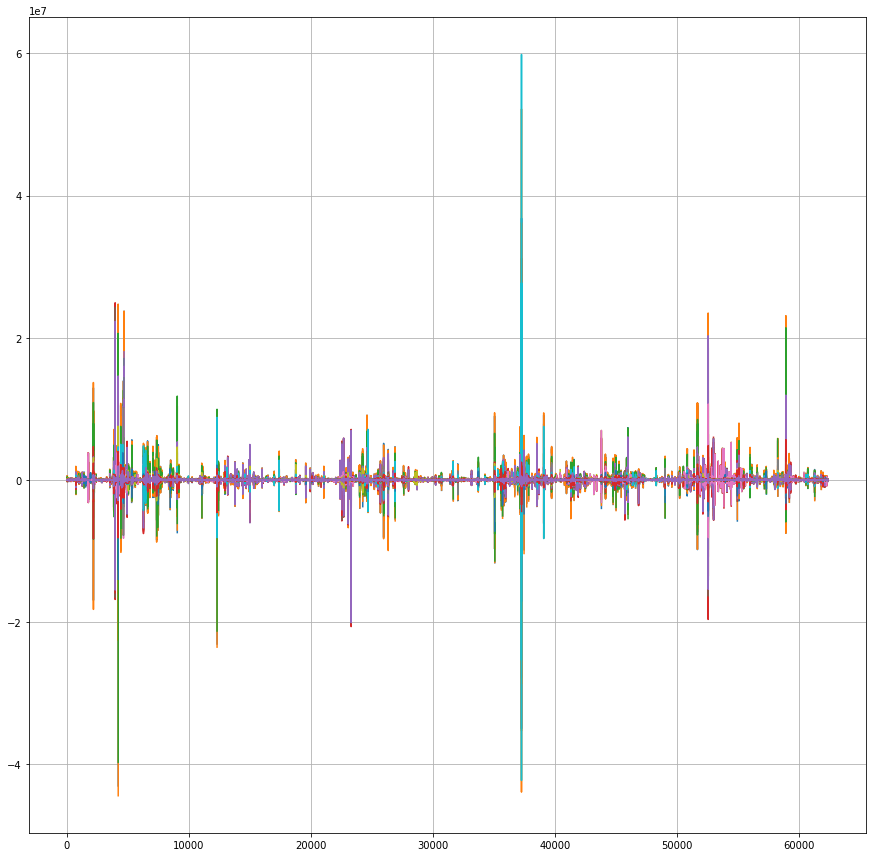

In [147]:
plt.figure(figsize=[15,15])
plt.grid(True)
plt.plot(full_df.reset_index().groupby(["GeoFips"]).diff())


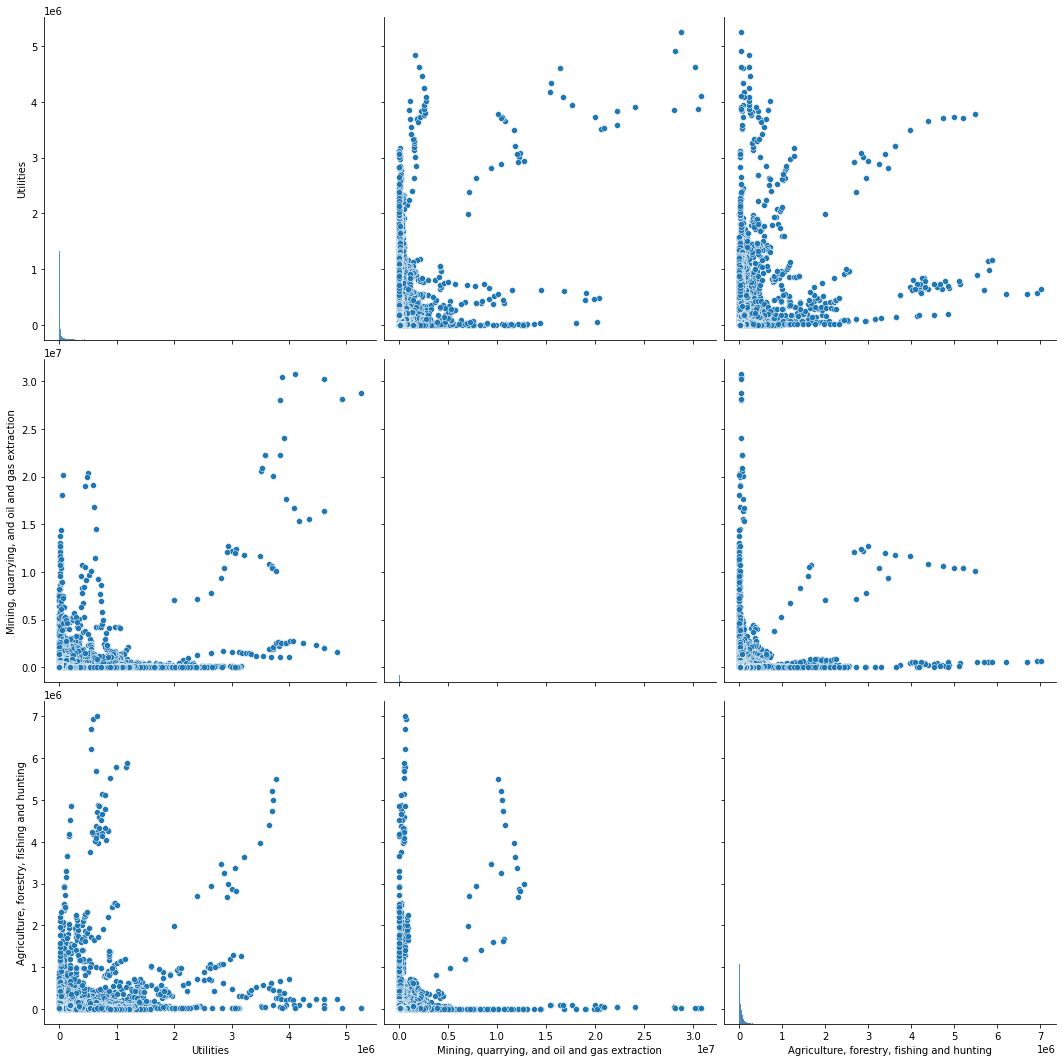

In [157]:
import seaborn as sns
g = sns.pairplot(full_df.reset_index().groupby(["GeoFips"]).rolling(4).mean()[["Utilities","Mining, quarrying, and oil and gas extraction", "Agriculture, forestry, fishing and hunting"]], height = 5)
